# import liberaries

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



# Read the csv file

In [7]:
df = pd.read_csv('seattle-weather.csv')
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,1/1/2012,0.0,12.8,5.0,4.7,drizzle
1,1/2/2012,10.9,10.6,2.8,4.5,rain
2,1/3/2012,0.8,11.7,7.2,2.3,rain
3,1/4/2012,20.3,12.2,5.6,4.7,rain
4,1/5/2012,1.3,8.9,2.8,6.1,rain


# Check the null values in the dataset

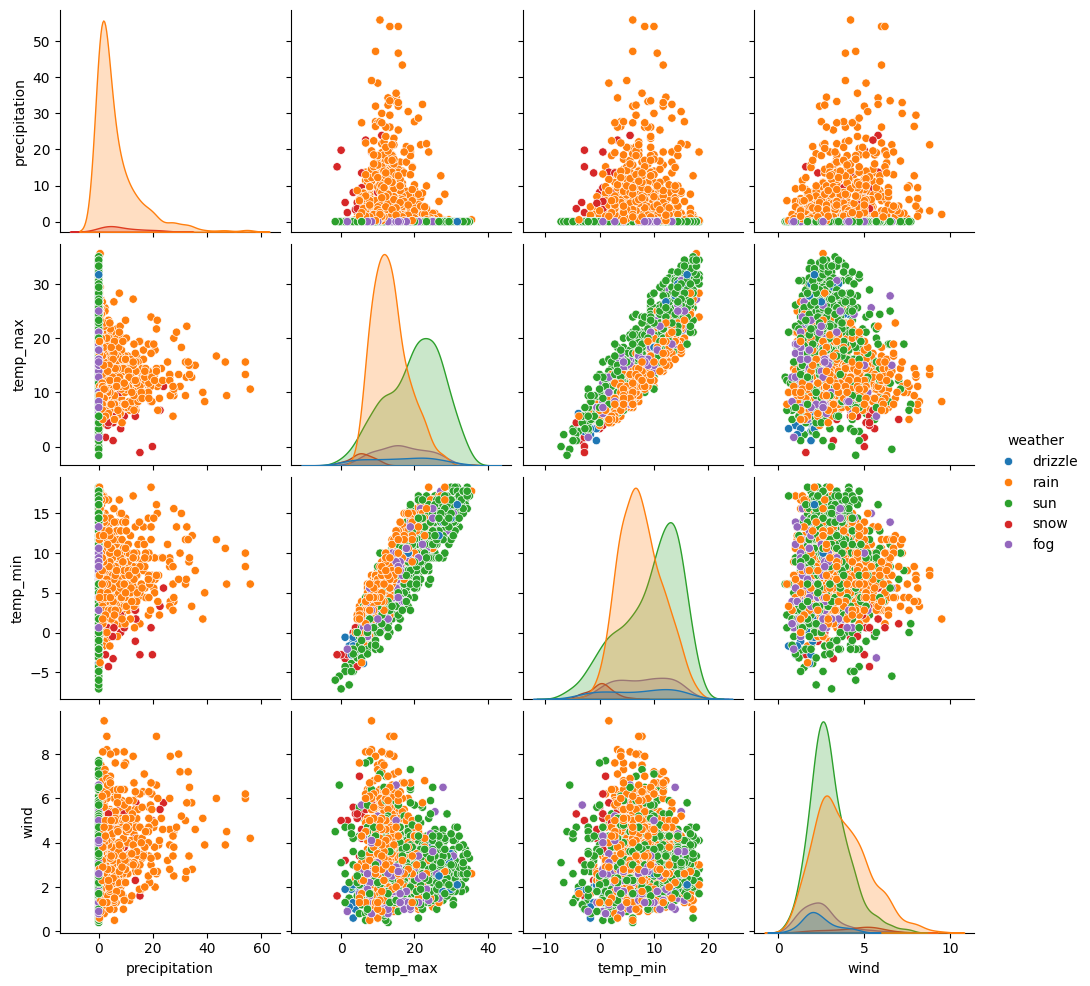

In [8]:
df.isnull().sum()

sns.pairplot(df, hue='weather')

# Use the Preprocessing and make LabelEncoder to convert categarical data into numerical data

In [10]:
def labelencoding(c):
    from sklearn import preprocessing
    le = preprocessing.LabelEncoder()
    df[c] = le.fit_transform(df[c])
    df[c].unique

labelencoding('weather')
df

,date,precipitation,temp_max,temp_min,wind,weather
0,1/1/2012,0.0,12.8,5.0,4.7,0
1,1/2/2012,10.9,10.6,2.8,4.5,2
2,1/3/2012,0.8,11.7,7.2,2.3,2
3,1/4/2012,20.3,12.2,5.6,4.7,2
4,1/5/2012,1.3,8.9,2.8,6.1,2
...,...,...,...,...,...,...
1456,12/27/2015,8.6,4.4,1.7,2.9,2
1457,12/28/2015,1.5,5.0,1.7,1.3,2
1458,12/29/2015,0.0,7.2,0.6,2.6,1
1459,12/30/2015,0.0,5.6,-1.0,3.4,4


# Using Normalization saperate columns which you want to normalize and save into variable 

In [11]:
cols = ["precipitation", "temp_max", "temp_min","wind"]

In [13]:
def normalize(df, cols):
    for x in cols:
        df[x] = df[x]/df[x].max()
    
normalize(df, cols)
df

,date,precipitation,temp_max,temp_min,wind,weather
0,1/1/2012,0.000000,0.359551,0.273224,0.494737,0
1,1/2/2012,0.194991,0.297753,0.153005,0.473684,2
2,1/3/2012,0.014311,0.328652,0.393443,0.242105,2
3,1/4/2012,0.363148,0.342697,0.306011,0.494737,2
4,1/5/2012,0.023256,0.250000,0.153005,0.642105,2
...,...,...,...,...,...,...
1456,12/27/2015,0.153846,0.123596,0.092896,0.305263,2
1457,12/28/2015,0.026834,0.140449,0.092896,0.136842,2
1458,12/29/2015,0.000000,0.202247,0.032787,0.273684,1
1459,12/30/2015,0.000000,0.157303,-0.054645,0.357895,4


In [14]:
df = df.drop("date", axis=1)
df

,precipitation,temp_max,temp_min,wind,weather
0,0.000000,0.359551,0.273224,0.494737,0
1,0.194991,0.297753,0.153005,0.473684,2
2,0.014311,0.328652,0.393443,0.242105,2
3,0.363148,0.342697,0.306011,0.494737,2
4,0.023256,0.250000,0.153005,0.642105,2
...,...,...,...,...,...
1456,0.153846,0.123596,0.092896,0.305263,2
1457,0.026834,0.140449,0.092896,0.136842,2
1458,0.000000,0.202247,0.032787,0.273684,1
1459,0.000000,0.157303,-0.054645,0.357895,4


In [15]:
x = df.drop("weather", axis=1)
y = df['weather']

# Training and Testing the sets

In [16]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


# Apply xgboost classifier

<!-- Apply xgboost classifier -->

In [30]:
from xgboost import XGBClassifier


In [31]:
xg = XGBClassifier()
xg.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

# Predict the model

In [32]:
y_pred = xg.predict(x_test)
print(y_pred)

[4 2 2 0 2 2 4 4 2 4 4 4 2 4 4 2 4 2 4 4 2 4 2 4 4 2 2 4 4 4 2 4 1 3 4 2 2
 3 2 4 2 4 4 4 4 2 2 4 2 4 4 2 4 2 4 2 2 4 2 4 2 4 2 4 4 4 2 4 2 2 2 4 4 2
 2 4 2 4 2 2 2 4 2 4 2 4 4 2 4 2 2 4 2 2 2 4 4 2 4 2 4 4 2 3 2 4 4 2 1 2 2
 4 2 2 4 0 4 4 4 2 2 2 2 2 4 4 4 4 4 4 4 4 4 0 4 4 2 2 2 4 4 4 2 2 4 1 4 2
 4 4 2 4 4 4 2 3 1 4 2 2 1 4 2 4 4 2 2 4 4 4 2 2 4 4 2 2 0 4 0 2 4 4 4 2 2
 2 2 2 4 4 4 4 4 2 4 4 4 2 2 2 2 4 0 2 4 2 2 4 3 4 2 4 4 4 4 4 4 4 2 4 2 4
 4 4 4 2 4 2 4 3 4 2 4 4 2 4 4 4 4 4 2 2 4 2 4 4 4 4 2 2 2 2 2 4 4 1 2 4 2
 2 2 2 4 2 4 4 2 1 4 4 4 1 4 2 4 4 2 2 4 4 4 2 4 2 4 4 2 4 1 2 1 2 4]


In [33]:
print(y_test)

892     4
1105    2
413     2
522     4
1036    2
       ..
1361    4
802     2
651     1
722     2
254     4
Name: weather, Length: 293, dtype: int64


# Check the classification report and accuracy score

In [34]:
from sklearn.metrics import classification_report, accuracy_score

In [35]:
print(f"Accuracy score = {accuracy_score(y_test, y_pred)}")
print(f"Classification Report = {classification_report(y_test, y_pred)}")

Accuracy score = 0.8088737201365188
Classification Report =               precision    recall  f1-score   support

           0       0.17      0.11      0.13         9
           1       0.50      0.20      0.29        25
           2       0.92      0.92      0.92       120
           3       0.33      0.25      0.29         8
           4       0.79      0.91      0.84       131

    accuracy                           0.81       293
   macro avg       0.54      0.48      0.49       293
weighted avg       0.78      0.81      0.79       293



In [36]:
xg.get_params()

{'objective': 'multi:softprob',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'device': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'feature_weights': None,
 'gamma': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': None,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [37]:
# using gamma and learning_rate we can increase accuracy
# create a disctnory to get learning rate and gama values
grid = { 'learning_rate': [0.1,  1,  0.01, 0.001], 'gamma': [0, 1, 10, 100]}

In [38]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# create a model
model = GridSearchCV(xg, grid, cv= 10, verbose=2) # cv(cross validation)

In [40]:
# apply a model to training sets
model.fit(x_train, y_train)

Fitting 10 folds for each of 16 candidates, totalling 160 fits
[CV] END .........................gamma=0, learning_rate=0.1; total time=   0.0s
[CV] END .........................gamma=0, learning_rate=0.1; total time=   0.0s
[CV] END .........................gamma=0, learning_rate=0.1; total time=   0.0s
[CV] END .........................gamma=0, learning_rate=0.1; total time=   0.0s
[CV] END .........................gamma=0, learning_rate=0.1; total time=   0.0s
[CV] END .........................gamma=0, learning_rate=0.1; total time=   0.0s
[CV] END .........................gamma=0, learning_rate=0.1; total time=   0.0s
[CV] END .........................gamma=0, learning_rate=0.1; total time=   0.0s
[CV] END .........................gamma=0, learning_rate=0.1; total time=   0.0s
[CV] END .........................gamma=0, learning_rate=0.1; total time=   0.0s
[CV] END ...........................gamma=0, learning_rate=1; total time=   0.0s
[CV] END ...........................gamma=0, l

GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, feature_weights=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             param_grid={'gamma': [0, 1, 10, 100],
                         'learning_rate': [0.1, 1, 0.01, 0.001]},
             verbose=2)

In [42]:
# apply my model into testing data
grid_pred = model.predict(x_test)
print(grid_pred)

[4 2 4 4 2 2 4 4 2 4 4 4 2 4 4 2 4 4 4 4 2 4 2 4 4 2 4 4 4 4 2 4 4 3 4 2 2
 2 2 4 2 4 4 4 4 2 2 4 2 4 4 2 4 2 4 2 2 4 2 4 2 4 2 4 4 4 2 4 2 2 2 4 4 2
 2 4 2 4 2 2 2 4 2 4 2 4 4 2 4 2 2 4 4 2 2 4 4 2 4 2 4 4 2 2 2 4 4 2 4 2 2
 4 2 2 4 4 4 4 4 2 2 2 2 2 4 4 4 4 4 4 4 4 4 4 4 4 2 2 2 4 4 4 2 2 4 4 4 2
 4 4 2 4 4 4 2 2 4 4 2 2 4 4 2 4 4 2 2 4 4 4 2 2 4 4 2 2 4 4 4 2 4 4 4 2 2
 4 2 2 4 4 4 4 4 2 4 4 4 2 2 2 2 4 4 2 4 2 2 4 3 4 2 4 4 4 4 4 4 4 2 4 2 4
 4 4 4 2 4 2 4 3 4 2 4 4 2 4 4 4 4 4 2 2 4 2 4 4 4 4 2 2 2 2 2 4 4 4 2 4 2
 2 2 2 4 2 4 4 2 4 4 4 4 4 4 2 4 4 2 2 4 4 4 2 4 4 4 4 2 4 4 2 4 2 4]


In [44]:
# check the accuracy score
print(f"Accuracy score : {accuracy_score(y_test, grid_pred)}")
print(f"Classification report : {classification_report(y_test, grid_pred)}")


Accuracy score : 0.825938566552901
Classification report :               precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.00      0.00      0.00        25
           2       0.94      0.92      0.93       120
           3       0.33      0.12      0.18         8
           4       0.76      1.00      0.86       131

    accuracy                           0.83       293
   macro avg       0.41      0.41      0.39       293
weighted avg       0.73      0.83      0.77       293



c:\Users\amida\AppData\Local\Programs\Python\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\amida\AppData\Local\Programs\Python\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\amida\AppData\Local\Programs\Python\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()